<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

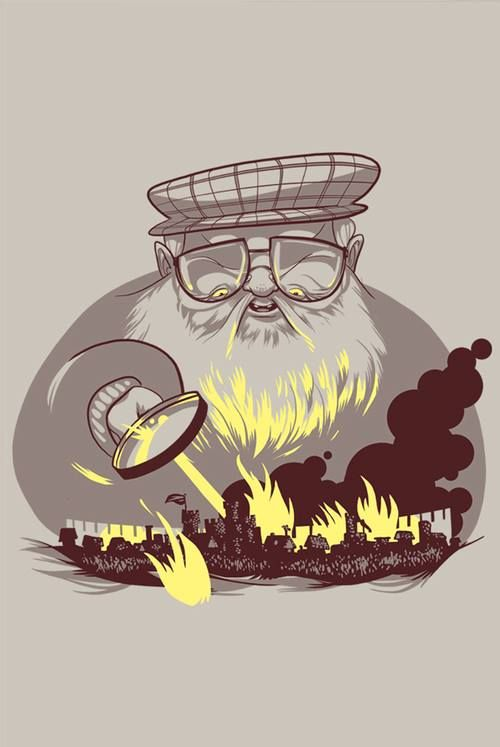

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [ ]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 45.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 63.6MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [ ]:
data = pd.read_csv('/content/game_of_thrones_train.csv', index_col='S.No')

**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [ ]:
data.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   mother            18 non-null     object 
 6   father            22 non-null     object 
 7   heir              21 non-null     object 
 8   house             1176 non-null   object 
 9   spouse            200 non-null    object 
 10  book1             1557 non-null   int64  
 11  book2             1557 non-null   int64  
 12  book3             1557 non-null   int64  
 13  book4             1557 non-null   int64  
 14  book5             1557 non-null   int64  
 15  isAliveMother     18 non-null     float64
 16  isAliveFather     22 non-null     float64
 17  

<BarContainer object of 25 artists>

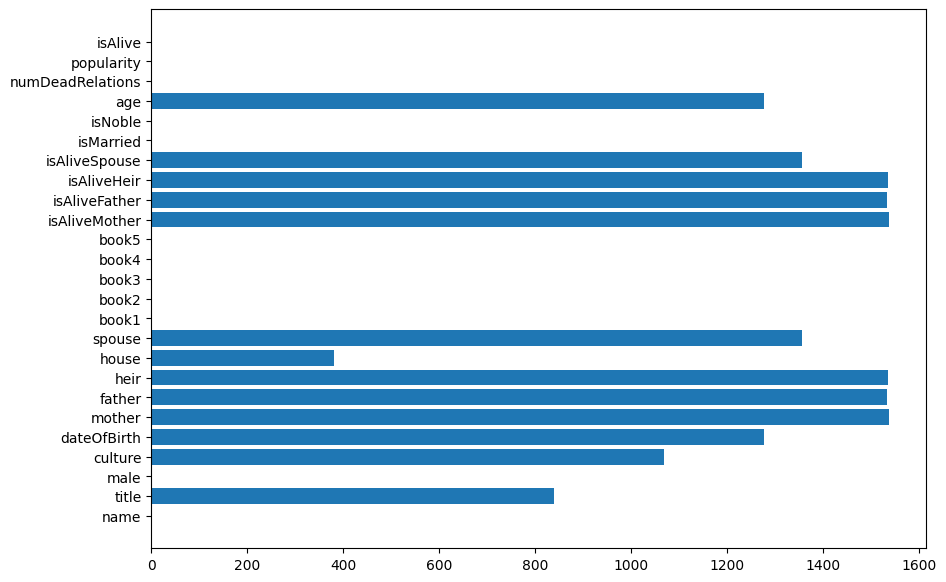

In [ ]:
datana = data.isna().sum(axis=0)
plt.figure(figsize=(10,7))
plt.barh(datana.index, datana.values)

In [ ]:
data.describe()

,male,dateOfBirth,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
count,1557.000000,279.000000,1557.000000,1557.000000,1557.000000,1557.000000,1557.000000,18.000000,22.000000,21.000000,200.00000,1557.000000,1557.000000,279.000000,1557.000000,1557.000000,1557.000000
mean,0.590880,247.551971,0.138728,0.327553,0.431599,0.562620,0.330122,0.666667,0.227273,0.666667,0.79000,0.128452,0.439306,35.290323,0.187540,0.062400,0.778420
std,0.491829,61.550441,0.345774,0.469472,0.495458,0.496223,0.470408,0.485071,0.428932,0.483046,0.40833,0.334700,0.496462,26.364864,1.114648,0.121416,0.415443
min,0.000000,-25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,241.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,16.000000,0.000000,0.013378,1.000000
50%,1.000000,272.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.00000,0.000000,0.000000,24.000000,0.000000,0.023411,1.000000
75%,1.000000,286.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.00000,0.000000,1.000000,49.000000,0.000000,0.063545,1.000000
max,1.000000,299.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,100.000000,15.000000,1.000000,1.000000


В этих столбцах почти нет данных. Удалим их позже.

In [ ]:
dropcols = ['mother', 'father', 'heir',
            'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse']

Также удалим текстовые признаки, которые не будем приводить к числовому формату.

In [ ]:
dropcols += ['name', 'house', 'spouse']

In [ ]:
data[data['dateOfBirth'].isna() ^ data['age'].isna()].shape[0]

0

Т.е. или в обоих столбцах NaN, или определенное значение. Добавим к удалению один из столбцов.

In [ ]:
dropcols += ['dateOfBirth']

Там, где не указан culture, вставим специальное значение.

In [ ]:
data.loc[data['culture'].isna(), 'culture'] = 'None'

Аналогично для title.

In [ ]:
data.loc[data['title'].isna(), 'title'] = 'None'

In [ ]:
data.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,None,1,None,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,None,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,None,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


<Axes: >

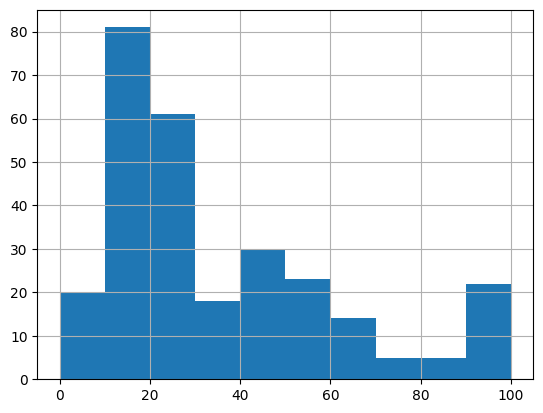

In [ ]:
data['age'].hist()

In [ ]:
# Заполним пропуски в age средним значением
age_mean = data['age'].mean()
print(age_mean)

data.fillna({'age': age_mean}, inplace=True)

35.29032258064516


<BarContainer object of 25 artists>

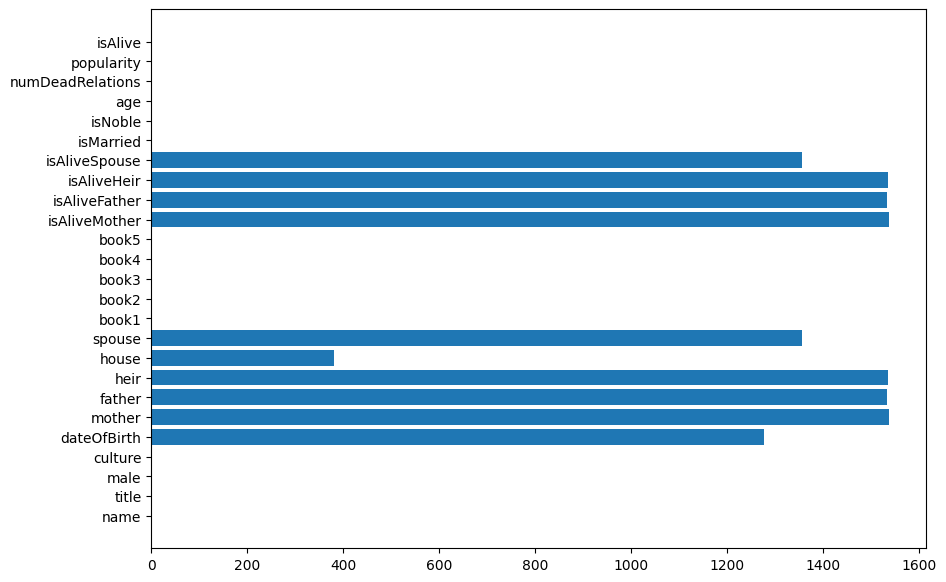

In [ ]:
datana = data.isna().sum(axis=0)
plt.figure(figsize=(10,7))
plt.barh(datana.index, datana.values)

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой-то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие-то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


<Axes: >

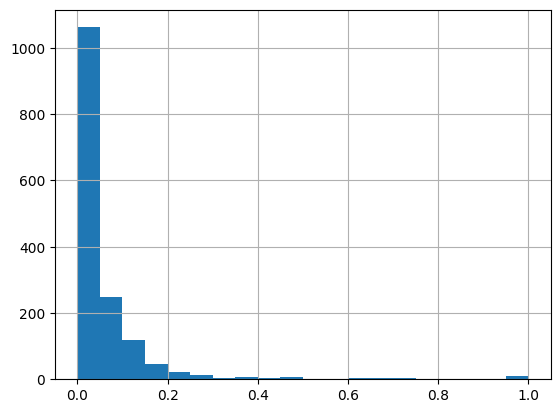

In [ ]:
data['popularity'].hist(bins=20)

In [ ]:
# По гистограмме мне показалось, что такой порог будет лучше
threshold = 0.25
data['isPopular'] = 0
data.loc[data['popularity'] >= threshold, 'isPopular'] = 1

print('Количество популярных персонажей:',
      data[data['isPopular'] == 1].shape[0])

Количество популярных персонажей: 61


In [ ]:
# Добавим аналогично признак boolDeadRelations
data['boolDeadRelations'] = 0
data.loc[data['numDeadRelations'] > 0, 'boolDeadRelations'] = 1

print('Количество персонажей, у кого были хоть какие-то отношения',
      'с мертвыми персонажами:', data[data['boolDeadRelations'] == 1].shape[0])

Количество персонажей, у кого были хоть какие-то отношения с мертвыми персонажами: 69


In [ ]:
# Подсказка
# Добавил новые элементы
# Может быть, можно еще что-нибудь объединить, но я не разбираюсь в Игре престолов
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles',
                       'Summer Isles', 'Summer Islander'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis', 'Ghiscaricari'],
    'Asshai': ["asshai'i", 'asshai', "Asshai'i"],
    'Lysene': ['lysene', 'lyseni', 'Lyseni'],
    'Andal': ['andal', 'andals', 'Andals'],
    'Braavosi': ['braavosi', 'braavos', 'Braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish', 'Dornishmen'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands', 'Westerman'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander', 'Stormlander'],
    'Norvoshi': ['norvos', 'norvoshi', 'Norvos'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk', 'Free folk'],
    'Qartheen': ['qartheen', 'qarth', 'Qarth'],
    'Reach': ['the reach', 'reach', 'reachmen', 'The Reach', 'Reachmen'],
    'Ironborn': ['ironborn'],
    'Valemen': ['Vale mountain clans'],
    'Lhazareen': ['Lhazarene'],
    'Wildling': ['Wildlings'],
    'Rivermen': ['Riverlands']
}

In [ ]:
for pure, dirty in cult.items():
  data['culture'] = data['culture'].replace(dirty, pure)

Проделаем аналогичное действие для столбца title. В Other вошли группы, в которых мало экземпляров.

In [ ]:
titles_map = {
    'Lord': ['Lord of the Crossing', 'Lord of the Iron Islands',
             'Lord of Coldmoat', 'Lord of the Tides', 'Lord of Dragonstone',
             'Lord Steward of the Iron Islands', 'Lord Paramount of the Mander',
             'Lord of Sunflower Hall', 'Lord of the Marches',
             'Lord of the Red Dunes', 'Lord Reaper of Pyke', 'Lord Seneschal',
             'Lord of Greyshield', "Lord Commander of the Night's Watch",
             'Lord of the Snakewood', 'Lord of Crows Nest',
             'Lord of the Deep Den', 'Lord of Darry',
             'Lord Paramount of the Trident', 'Lord of Pebbleton',
             'Lord of Atranta', 'Lord of Oldcastle', 'Lord of Southshield',
             "Lord of Flint's Finger",
             'Lord of the Ten TowersLord Harlaw of HarlawHarlaw of Harlaw',
             'The LiddleLord Liddle', 'Lord of the Tor', 'Lord of Iron Holt',
             'Lord of Honeyholt', 'Lord of Kingsgrave', 'Lord of Starfall',
             'Lord of Hellholt', 'Lord of Harrenhal'],
    'KingQueen': ['King in the North', 'King-Beyond-the-Wall',
                  'King of the Andals', 'King of the Iron Islands',
                  'King of Astapor', 'PrincessQueen', 'LadyQueenDowager Queen',
                  'QueenBlack Bride', 'LadyQueen', 'Queen'],
    'Knight': ['Serthe Knight of Saltpans', "Knight of Griffin's Roost"],
    'Lady': ['Lady Marya', "Lady of Torrhen's Square", 'Lady of Darry'],
    'Master': ['Good Master', 'Master-at-Arms', 'Master of coin', 'Oarmaster',
               'Master of Coin', 'Master of Harlaw Hall', 'master of ships',
               'Master of Deepwood Motte'],
    'Prince': ['Prince of Dragonstone', 'PrincessSepta', 'Prince of Dorne',
               'Prince of Winterfell', 'Princess'],
    'Other': ['Chief Undergaoler', 'Fair Isle', 'Lordsport', 'Undergaoler',
       'Coldwater Burn', 'Cobblecat', 'Longsister', 'Rills', 'BrotherProctor',
       'Runestone', 'Crakehall', 'Wyndhall', 'CastellanCommander', 'Sandstone',
       'Hightower', 'Banefort', 'First Sword of Braavos', 'red hand',
       'Magister of Pentos', 'Ghost Hill', "Rook's Rest", 'Kayce',
       'Deepwood Motte', 'Captain', 'Rain House', 'Red Flower Vale',
       'Foamdrinker', 'Eastwatch-by-the-Sea', 'Light of the West', 'Nightsong',
       'Commander of the Second Sons', 'Greenstone', 'Protector of the Realm',
       'Maidenpool', 'Dragonstone', 'Grey Glen', 'Three Sisters',
       'Sealskin Point', 'Salt Shore', 'Three Towers', 'Ten Towers',
       'Acorn Hall', 'Mistress of whisperers', 'Shatterstone', 'Volmark',
       'Greenshield', 'Harridan Hill', 'Dyre Den', 'Hayford', 'Longbow Hall',
       'Grassy Vale', 'Sharp Point', 'Blue Grace', 'Godsgrace', 'Red Priest',
       'Pinkmaiden', 'Goldengrove', 'Tradesman-Captain', 'Strongsong',
       'Ironoaks', 'Claw Isle', 'Hornvale', 'Whitewalls', 'Seagard',
       'Brightwater', 'Broad Arch', 'Wind Witch', 'Sealord', 'Skyreach',
       'Feastfires', 'Goodman', 'Uplands', 'Seven Kingdoms', "Heart's Home",
       'Wraith', 'Castle Lychester', "Widow's Watch", 'Blackmont',
       "Karl's Hold", 'First Ranger', 'Big BucketThe Wull',
       'Tower of Glimmering', 'Redfort', 'Goldgrass', 'Felwood',
       'High Steward of Highgarden', 'Sweetport Sound', 'Seneschal',
       'Sweetsister', 'Gulltown', 'Highgarden',
        'Starpike', 'Duskendale', 'Brother', 'Last Hearth', 'Harrenhal',
       'Casterly Rock', 'Eyrie', 'Bloodrider', 'Bitterbridge', 'Cerwyn',
       'Crag', 'Yronwood', 'Stonehelm', 'KhalKo (formerly)', 'Riverrun',
       'Captain of the guard', 'Coldmoat', 'Golden Tooth', 'Blackcrown',
       'Ashford', 'Goodwife', 'Khalakka', 'Hornwood', 'Hand of the King',
       'Steward', 'Stokeworth', 'Castellan', 'Karhold']
}

for pure, dirty in titles_map.items():
  data['title'] = data['title'].replace(dirty, pure)

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [ ]:
data.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,None,1,None,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,0.0,NaN,0,0,35.290323,11,0.605351,0,1,1
2,Walder Frey,Lord,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,1.0,1,1,97.000000,1,0.896321,1,1,1
3,Addison Hill,Ser,1,None,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,0,1,35.290323,0,0.267559,1,1,0
4,Aemma Arryn,KingQueen,0,None,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,0.0,1,1,23.000000,0,0.183946,0,0,0
5,Sylva Santagar,Other,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,1.0,1,1,29.000000,0,0.043478,1,0,0


Проанализируем количественные признаки.

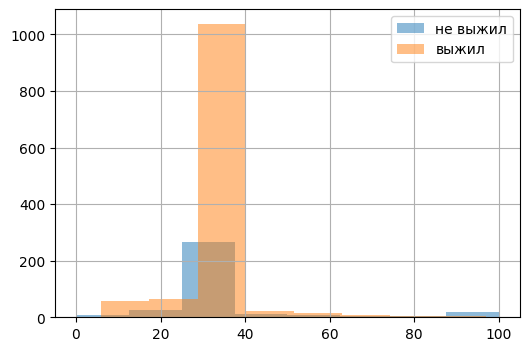

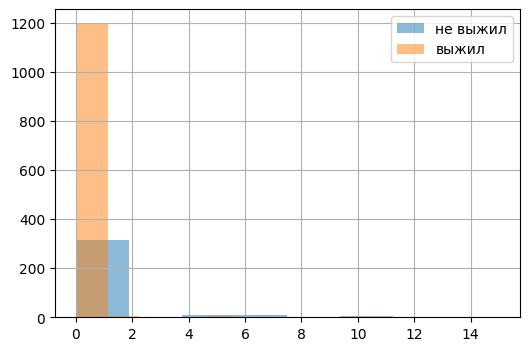

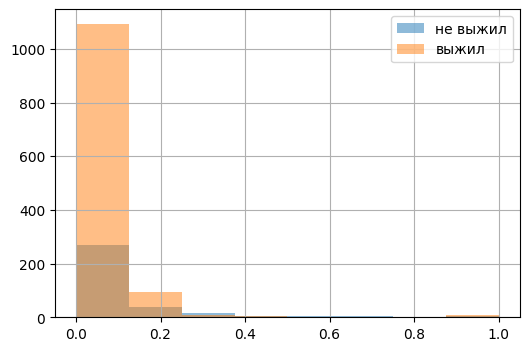

In [ ]:
numerical_cols = ['age', 'numDeadRelations', 'popularity']

for col in numerical_cols:
  plt.figure(figsize=(6, 4))
  plt.hist(data[col][data['isAlive'] == 0], alpha=0.5, label='не выжил', bins=8)
  plt.hist(data[col][data['isAlive'] == 1], alpha=0.5, label='выжил', bins=8)
  plt.legend()
  plt.grid()
  plt.show()

Проанализируем бинарные признаки.

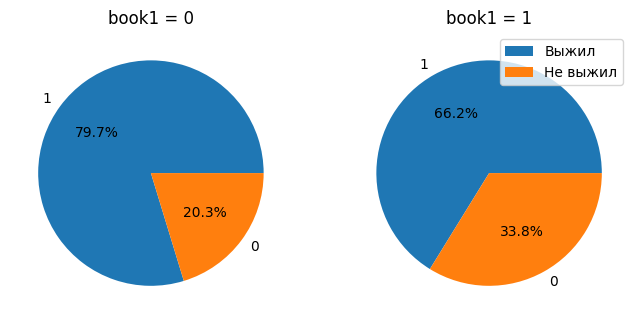

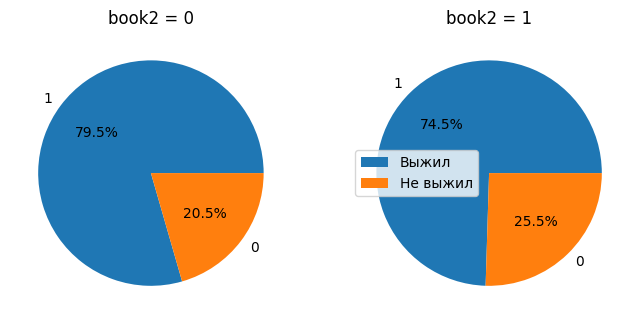

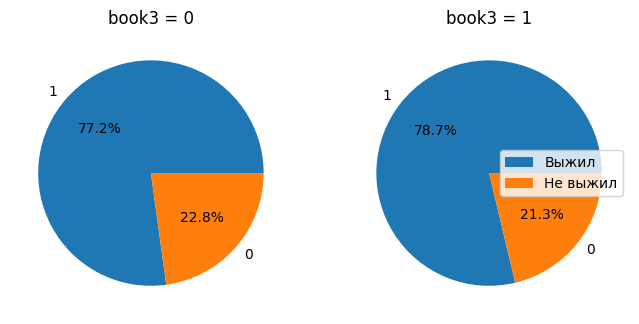

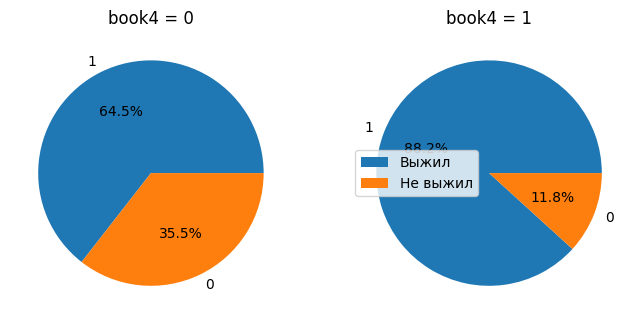

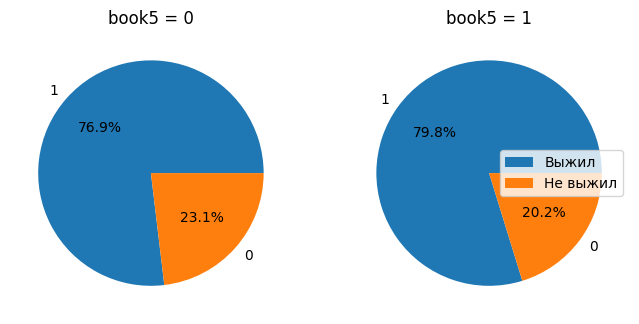

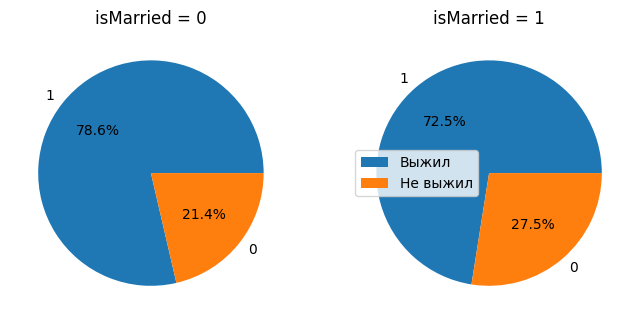

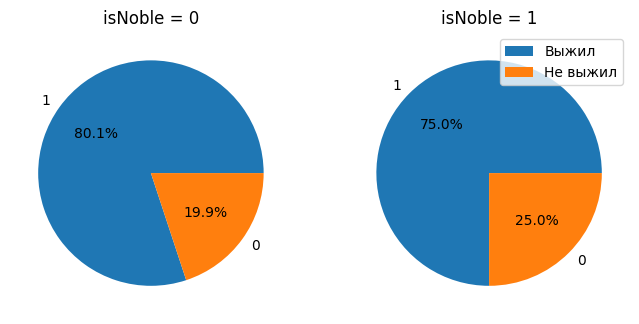

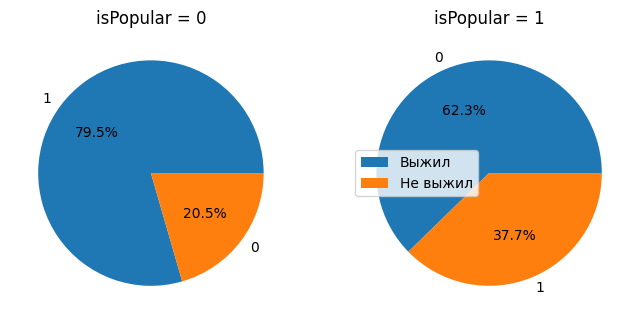

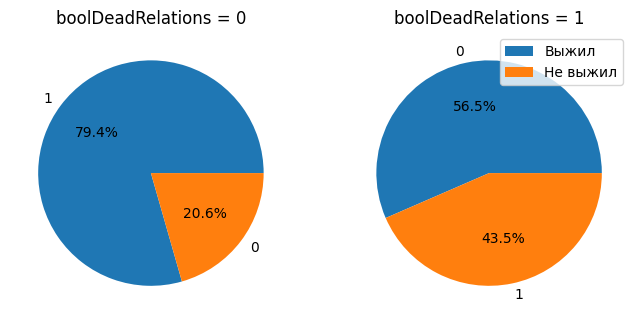

In [ ]:
bin_cols = ['book1', 'book2', 'book3', 'book4', 'book5', 'isMarried', 'isNoble',
            'isPopular', 'boolDeadRelations']

for col in bin_cols:
  data1 = data[data[col] == 0]['isAlive'].value_counts()
  data2 = data[data[col] == 1]['isAlive'].value_counts()

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

  ax1.pie(data1.values, labels=data1.index, autopct='%1.1f%%')
  ax2.pie(data2.values, labels=data2.index, autopct='%1.1f%%')

  ax1.set_title(f"{col} = 0")
  ax2.set_title(f"{col} = 1")

  plt.legend(['Выжил', 'Не выжил'])

  plt.show()

Несмотря на то, что некоторые признаки особо не влияют на целевую переменную, оставим их. Наиболее существенное влияние оказывают boolDeadRelations, isPopular, book4 и book1.

Удалим только те столбцы, которые пометили ранее.

In [ ]:
data.drop(columns=dropcols, inplace=True)

In [ ]:
data.head(10)

,title,male,culture,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,
1,None,1,None,0,0,0,0,0,0,0,35.290323,11,0.605351,0,1,1
2,Lord,1,Rivermen,1,1,1,1,1,1,1,97.000000,1,0.896321,1,1,1
3,Ser,1,None,0,0,0,1,0,0,1,35.290323,0,0.267559,1,1,0
4,KingQueen,0,None,0,0,0,0,0,1,1,23.000000,0,0.183946,0,0,0
5,Other,0,Dornish,0,0,0,1,0,1,1,29.000000,0,0.043478,1,0,0
6,None,1,None,0,0,0,0,0,0,0,35.290323,5,1.000000,1,1,1
7,Other,1,Valyrian,0,0,0,0,0,1,1,26.000000,0,0.431438,0,1,0
8,None,1,None,0,0,0,0,0,0,0,35.290323,5,0.678930,0,1,1
9,Ser,1,None,0,0,1,0,0,0,1,35.290323,0,0.006689,0,0,0


**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

In [ ]:
data['isAlive'].value_counts()

,count
isAlive,
1,1212
0,345


Целевая переменная является категориальной. Т.к. количество единиц сильно больше нуля, датасет не является сбалансированным.

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [ ]:
data.head(1)

,title,male,culture,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,
1,None,1,None,0,0,0,0,0,0,0,35.290323,11,0.605351,0,1,1


Только два категориальных признака. Применим для них One-Hot Encoding.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

cats = ['culture', 'title']

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(data[cats])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded,
                          columns=encoder.get_feature_names_out(cats),
                          index=data.index)

# Concatenate the one-hot encoded dataframe with the original dataframe
data_encoded = pd.concat([data, one_hot_df], axis=1)

# Drop the original categorical columns
data_encoded.drop(cats, axis=1, inplace=True)

In [ ]:
data_encoded.head()

,male,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,...,title_Maester,title_Master,title_None,title_Other,title_Prince,title_Septa,title_Septon,title_Ser,title_Winterfell,title_Wisdom
S.No,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,35.290323,11,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1,1,1,1,1,1,1,97.000000,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,0,1,0,0,1,35.290323,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,0,0,0,0,0,1,1,23.000000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,0,0,0,1,0,1,1,29.000000,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data_encoded.columns

Index(['male', 'book1', 'book2', 'book3', 'book4', 'book5', 'isMarried',
       'isNoble', 'age', 'numDeadRelations', 'popularity', 'isAlive',
       'isPopular', 'boolDeadRelations', 'culture_Andal', 'culture_Astapori',
       'culture_Braavosi', 'culture_Crannogmen', 'culture_Dorne',
       'culture_Dornish', 'culture_Dothraki', 'culture_First Men',
       'culture_Free Folk', 'culture_Ghiscari', 'culture_Ironborn',
       'culture_Ironmen', 'culture_Lhazareen', 'culture_Lysene',
       'culture_Meereenese', 'culture_Myrish', 'culture_None',
       'culture_Northern mountain clans', 'culture_Northmen',
       'culture_Norvoshi', 'culture_Pentoshi', 'culture_Qartheen',
       'culture_Qohor', 'culture_Reach', 'culture_Rivermen',
       'culture_Sistermen', 'culture_Stormlands', 'culture_Summer Islands',
       'culture_Tyroshi', 'culture_Vale', 'culture_Valemen',
       'culture_Valyrian', 'culture_Westerlands', 'culture_Westermen',
       'culture_Westeros', 'culture_Wildling', 'titl

In [ ]:
data.head()

,title,male,culture,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,
1,None,1,None,0,0,0,0,0,0,0,35.290323,11,0.605351,0,1,1
2,Lord,1,Rivermen,1,1,1,1,1,1,1,97.000000,1,0.896321,1,1,1
3,Ser,1,None,0,0,0,1,0,0,1,35.290323,0,0.267559,1,1,0
4,KingQueen,0,None,0,0,0,0,0,1,1,23.000000,0,0.183946,0,0,0
5,Other,0,Dornish,0,0,0,1,0,1,1,29.000000,0,0.043478,1,0,0


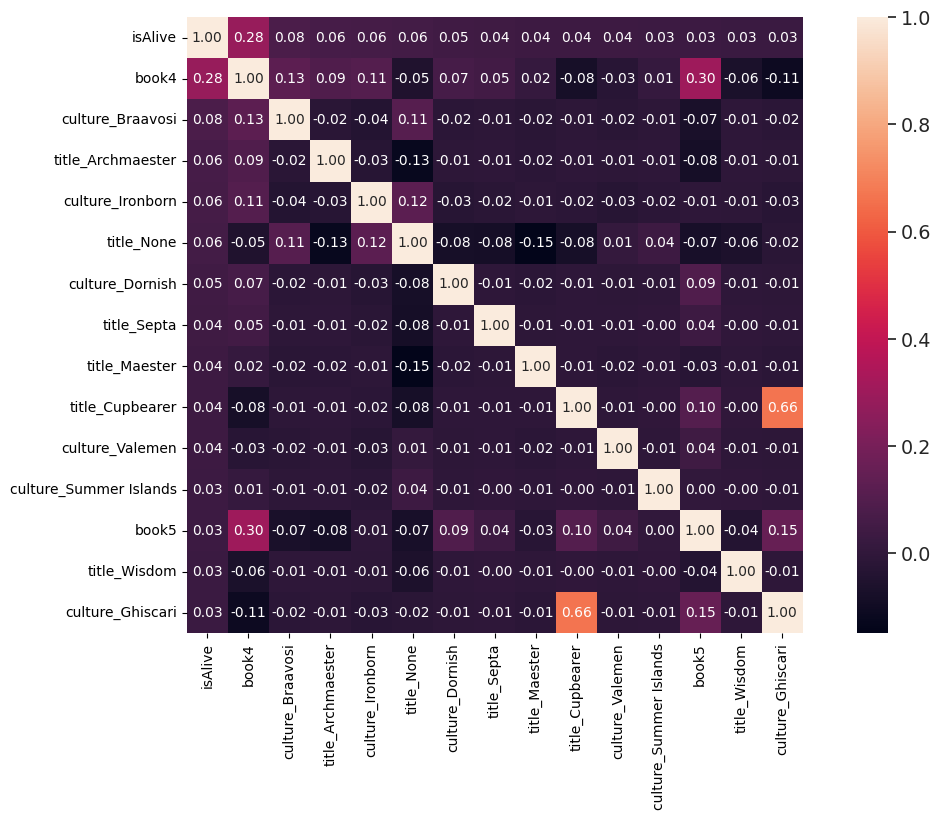

In [ ]:
# корреляция
import numpy as np

corrmat = data_encoded.corr()
k = 15
cols = corrmat.nlargest(k, 'isAlive')['isAlive'].index
cm = np.corrcoef(data_encoded[cols].values.T)

f, ax = plt.subplots(figsize=(14, 8))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',
                 annot_kws={'size': 10}, yticklabels=cols.values,
                 xticklabels=cols.values)
plt.show()

Наиболее сильно с целевой переменной коррелирует book4. Также интересной выглядит корреляция culture_Ghiscari и title_Cupbearer.

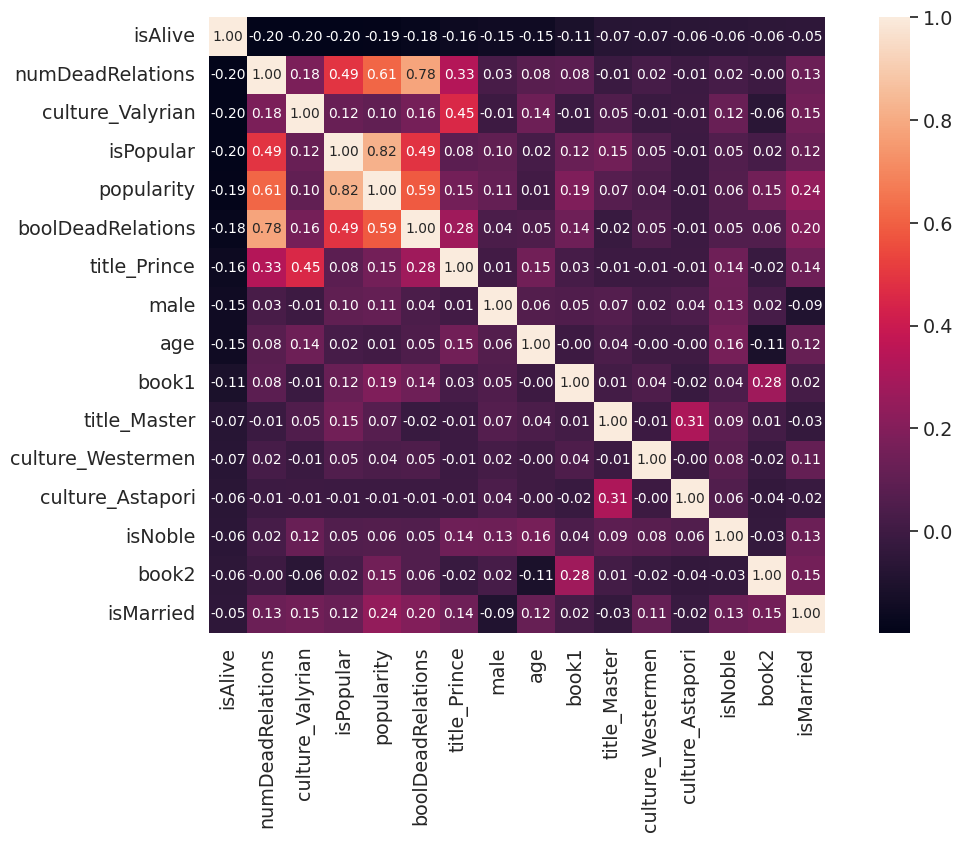

In [ ]:
cols = ['isAlive'] + list(corrmat.nsmallest(k, 'isAlive')['isAlive'].index)
cm = np.corrcoef(data_encoded[cols].values.T)

f, ax = plt.subplots(figsize=(14, 8))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',
                 annot_kws={'size': 10}, yticklabels=cols, xticklabels=cols)
plt.show()

Наиболее сильная обратная корреляция с isAlive у признака numDeadRelations.

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

In [ ]:
# Было сделано в задании 1.5

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [ ]:
X = data_encoded.drop(columns=['isAlive']).values
y = data_encoded['isAlive'].values

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                        random_state=42)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [ ]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [ ]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1, max_iter=10000)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [ ]:
# Шаг 1. создание модели
ada = AdaBoostClassifier(random_state=42, n_estimators=100)
random_forest = RandomForestClassifier(random_state=42, n_estimators=600)
gaussian_process = GaussianProcessClassifier(random_state=42)
naive_bayes = GaussianNB()
neighbors = KNeighborsClassifier(n_neighbors=10)
decision_tree = DecisionTreeClassifier(random_state=42)
svc = SVC(random_state=42)

# Шаг 2. обучение модели
ada.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
gaussian_process.fit(X_train, y_train)
naive_bayes.fit(X_train, y_train)
neighbors.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
svc.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
# Вычисляется ниже
# y_pred_tree = decision_tree.predict(X_test)

SVC(random_state=42)

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [ ]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [ ]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7628


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [ ]:
# Шаг 3. Предсказание на тестовых данных
y_pred_ada = ada.predict(X_test)
y_pred_random_forest = random_forest.predict(X_test)
y_pred_gauss = gaussian_process.predict(X_test)
y_pred_nb = naive_bayes.predict(X_test)
y_pred_neigh = neighbors.predict(X_test)
y_pred_tree = decision_tree.predict(X_test)
y_pred_svc = svc.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy_ada = accuracy_score(y_test, y_pred_ada)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
accuracy_gauss = accuracy_score(y_test, y_pred_gauss)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_neigh = accuracy_score(y_test, y_pred_neigh)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
accuracy_svc = accuracy_score(y_test, y_pred_svc)

print("Accuracy (AdaBoostClassifier): %.4f" % accuracy_ada)
print("Accuracy (RandomForestClassifier): %.4f" % accuracy_random_forest)
print("Accuracy (GaussianProcessClassifier): %.4f" % accuracy_gauss)
print("Accuracy (GaussianNB): %.4f" % accuracy_nb)
print("Accuracy (KNeighborsClassifier): %.4f" % accuracy_neigh)
print("Accuracy (DecisionTreeClassifier): %.4f" % accuracy_tree)
print("Accuracy (SVC): %.4f" % accuracy_svc)

Accuracy (AdaBoostClassifier): 0.7981
Accuracy (RandomForestClassifier): 0.8045
Accuracy (GaussianProcessClassifier): 0.7853
Accuracy (GaussianNB): 0.3397
Accuracy (KNeighborsClassifier): 0.7660
Accuracy (DecisionTreeClassifier): 0.7788
Accuracy (SVC): 0.7692


Выберите лучшую модель.

Лучше всего себя показал случайный лес.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [ ]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 12.2MB/s]


In [ ]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [ ]:
submission

,isAlive
S.No,
1558,0
1559,0
1560,0
1561,0
1562,0
...,...
1942,0
1943,0
1944,0


Как сохранить измененный Pandas DataFrame в csv файл:

In [ ]:
submission.to_csv("/content/new_submission.csv", index=False)

In [ ]:
data_test = pd.read_csv('/content/game_of_thrones_test.csv', index_col='S.No')

<BarContainer object of 24 artists>

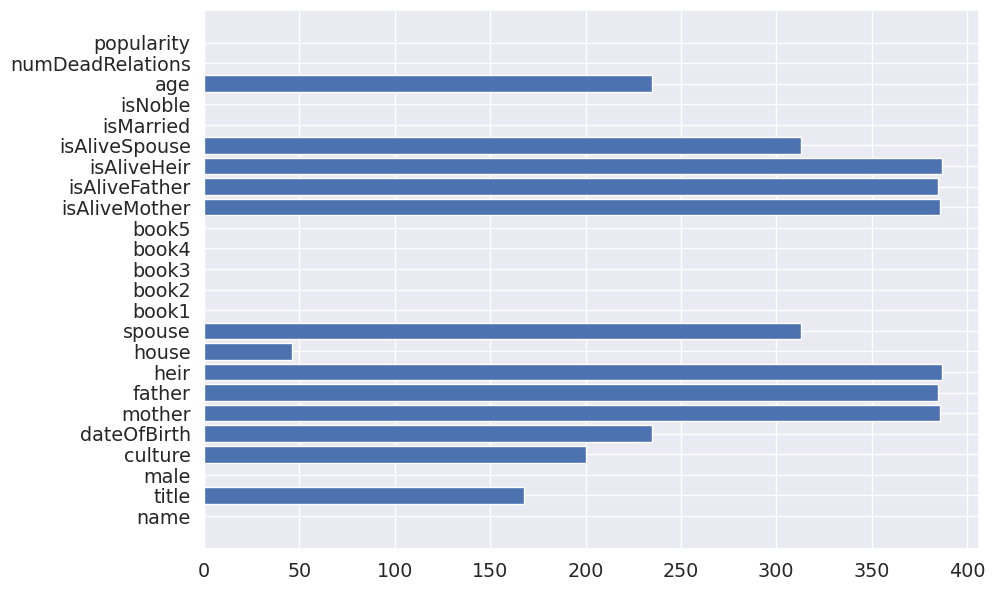

In [ ]:
datana = data_test.isna().sum(axis=0)
plt.figure(figsize=(10,7))
plt.barh(datana.index, datana.values)

In [ ]:
# Повторяем те же преобразования
data_test.drop(columns=dropcols, inplace=True)

data_test['isPopular'] = 0
data_test.loc[data_test['popularity'] >= threshold, 'isPopular'] = 1

data_test['boolDeadRelations'] = 0
data_test.loc[data_test['numDeadRelations'] > 0, 'boolDeadRelations'] = 1

for pure, dirty in cult.items():
  data_test['culture'] = data_test['culture'].replace(dirty, pure)

for pure, dirty in titles_map.items():
  data['title'] = data['title'].replace(dirty, pure)

# Заменяем все culture, которые не встречались в обучающей выборке, на None
new_cults = set(data_test['culture']) - set(data['culture'])
data_test.loc[data_test['culture'].isin(new_cults), 'culture'] = 'None'

new_titles = set(data_test['title']) - set(data['title'])
data_test.loc[data_test['title'].isin(new_titles), 'title'] = 'None'

data_test.loc[data_test['culture'].isna(), 'culture'] = 'None'
data_test.loc[data_test['title'].isna(), 'title'] = 'None'

data_test.fillna({'age': age_mean}, inplace=True)

In [ ]:
# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.transform(data_test[cats])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded,
                          columns=encoder.get_feature_names_out(cats),
                          index=data_test.index)

# Concatenate the one-hot encoded dataframe with the original dataframe
data_test_encoded = pd.concat([data_test, one_hot_df], axis=1)

# Drop the original categorical columns
data_test_encoded.drop(cats, axis=1, inplace=True)

In [ ]:
X_data_test = data_test_encoded.values

In [ ]:
y_data_test = random_forest.predict(X_data_test)
y_data_test_df = pd.DataFrame(y_data_test, columns=['isAlive'], index=data_test.index)

In [ ]:
y_data_test_df.head(2)

,isAlive
S.No,
1558,0
1559,1


In [ ]:
y_data_test_df.to_csv("/content/new_submission_random_forest_4.csv", index=False)

Accuracy на тестовых данных:

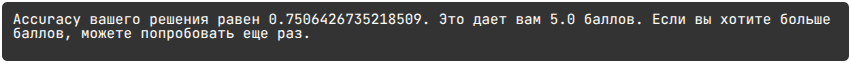